In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs

In [2]:
data= pd.read_csv("wine.csv")

In [3]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [41]:
explained_variance

array([0.3639525 , 0.18617733, 0.11864674, 0.07373451, 0.06839018,
       0.04537892, 0.03742704, 0.02655729, 0.02292711, 0.01925003,
       0.01735015, 0.01285622, 0.00735198])

In [42]:
pca.explained_variance_ratio_

array([0.3639525 , 0.18617733, 0.11864674, 0.07373451, 0.06839018,
       0.04537892, 0.03742704, 0.02655729, 0.02292711, 0.01925003,
       0.01735015, 0.01285622, 0.00735198])

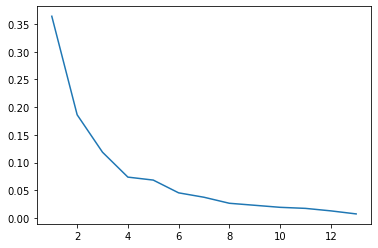

In [43]:
plt.plot(range(1,14), explained_variance)

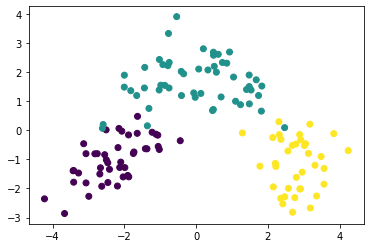

In [45]:
plt.scatter(X_train.T[0], X_train.T[1]  , c= y_train) # datasetten en değerli olan bileşenleri seçiyoruz
# scatterlar hiç belirleyici değil

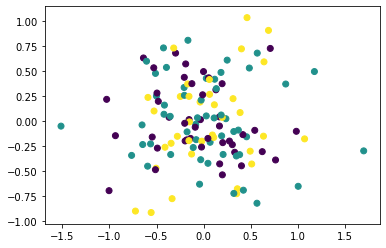

In [44]:
plt.scatter(X_train.T[10], X_train.T[11]  , c= y_train) # datasetten çok değerli olmayan bileşenleri seçiyoruz
# scatterlar hiç belirleyici değil

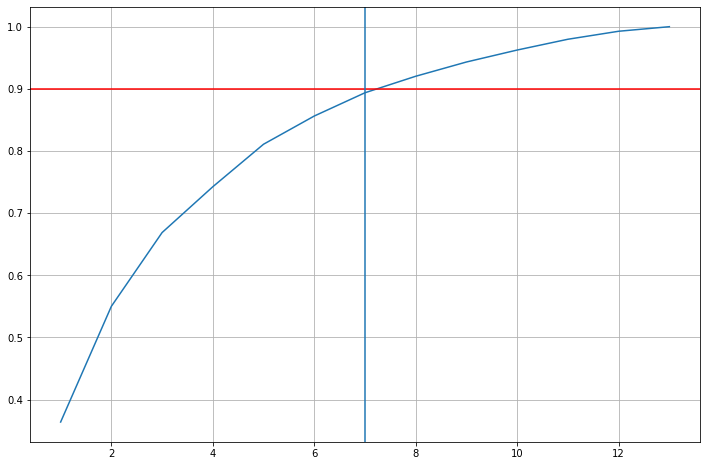

In [30]:
plt.figure(figsize=(12,8))
plt.plot(range(1,14), np.cumsum(explained_variance))
plt.axhline(0.9, c="red")
plt.axvline(7)
plt.grid()

In [ ]:
## Şimdi iki değişkenle scatter çizdirelim

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [80]:
sc = StandardScaler()  # önce skale ediliyor
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
pca = PCA(n_components= 4 )  # bileşenleri iki yapıyoruz
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [82]:
explained_variance  # iki bileşen olduğu için iki explained_variance geliyor

array([0.3639525 , 0.18617733, 0.11864674, 0.07373451])

In [83]:
pca.explained_variance_ratio_

array([0.3639525 , 0.18617733, 0.11864674, 0.07373451])

In [84]:
X_train.shape

(133, 4)

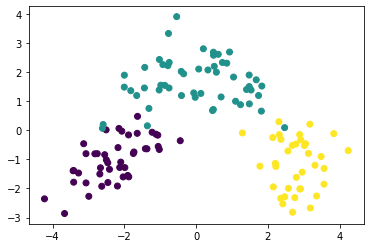

In [85]:
plt.scatter(X_train.T[0], X_train.T[1]  , c= y_train) # dataset temel bileşenleri açıklayıcı Net görünüyor

In [86]:
model= LogisticRegression()

In [87]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
model.score(X_train, y_train)  # component arttıkça skor artıyor

0.9774436090225563

In [89]:
y_pred= model.predict(X_test)

In [90]:
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2,
       3], dtype=int64)

In [91]:
cm= confusion_matrix(y_test, y_pred)  # component artıkça (train için) cm hatası azalması beklenir 
cm                                     # test için belli olmaz. çünkü overfit olma durumu var

array([[14,  1,  0],
       [ 0, 18,  0],
       [ 1,  0, 11]], dtype=int64)

## PCAyı kendimiz oluşturalım

In [159]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values
X.shape

(178, 13)

In [160]:
mü = X.mean(axis=0)  # kolonların ortalaması
std= X.std(axis=0)   # kolonların standart sapması
X_scale= (X - mü) / std
X_scale.shape

(178, 13)

In [161]:
X_cov = X_scale.T @ X_scale  # covergence matris oluşturduk
X_cov

array([[178.        ,  16.80265548,  37.65493816, -55.22185437,
         48.20208421,  51.45999982,  42.15305717, -27.75544507,
         24.33222829,  97.25282672, -12.77100112,  12.87708736,
        114.58216662],
       [ 16.80265548, 178.        ,  29.20009362,  51.3530717 ,
         -9.7143671 , -59.65972549, -73.1591726 ,  52.14992976,
        -39.29282125,  44.31939125, -99.91063258, -65.63045624,
        -34.1778805 ],
       [ 37.65493816,  29.20009362, 178.        ,  78.91935921,
         51.01243104,  22.9583577 ,  20.48375566,  33.14901944,
          1.71804446,  46.08193216, -13.29070625,   0.69619905,
         39.80547494],
       [-55.22185437,  51.3530717 ,  78.91935921, 178.        ,
        -14.83328977, -57.15817048, -62.5438351 ,  64.4220659 ,
        -35.12417676,   3.33429261, -48.76402964, -49.2648017 ,
        -78.42625377],
       [ 48.20208421,  -9.7143671 ,  51.01243104, -14.83328977,
        178.        ,  38.16341977,  34.84951103, -45.62034071,
         42.

In [162]:
u,s,v = np.linalg.svd(X_cov)  
u_reduce= u[:,1:3]
u_reduce.shape

(13, 2)

In [163]:
z= X_cov @ u_reduce

In [164]:
korunan_varyans = s / s.sum() 
korunan_varyans

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

### Lets try new things

In [147]:
x, y = make_blobs(900, 4, 5)
cov = x.T @ x


In [148]:
u, s, v = np.linalg.svd(cov)
print('U @ S @ V = cov')
print((cov - (u @ np.diag(s) @ v)) < 1e-9)


U @ S @ V = cov
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [149]:
print('ilk satirin ikinci satir uzerine izdusumu:')
print((u[0:1] @ u[1:2].T).round(2))  # herhangi iki satir/sutunun matris carpimi 0


ilk satirin ikinci satir uzerine izdusumu:
[[-0.]]


In [150]:
print('Tum sutunlarin diger sutunlar uzerine izdusumu (yalnizca kendi uzerine izdusumleri birim uzunluk):')
print((u @ u.T).round(2))   # yukaridaki olayin tum satir/sutunlar icin gosterimi

Tum sutunlarin diger sutunlar uzerine izdusumu (yalnizca kendi uzerine izdusumleri birim uzunluk):
[[ 1. -0.  0. -0.]
 [-0.  1. -0.  0.]
 [ 0. -0.  1.  0.]
 [-0.  0.  0.  1.]]


In [151]:
print('Sutun uzunluklari:')
print((u**2).sum(axis=1))   # sutunlar birim uzunluga esit
print('Satir uzunluklari:')
print((u**2).sum(axis=0))   # satirlar birim uzunluga esit

Sutun uzunluklari:
[1. 1. 1. 1.]
Satir uzunluklari:
[1. 1. 1. 1.]


In [152]:
print('Korunan varyans orani:')  # yani n_component=2 ile %86 oranında temsil ediliyor
print(s/s.sum())

Korunan varyans orani:
[0.593002   0.25848992 0.12769884 0.02080924]


In [153]:
n_components=2

In [154]:
X_pc = x @ u [:, :n_components]

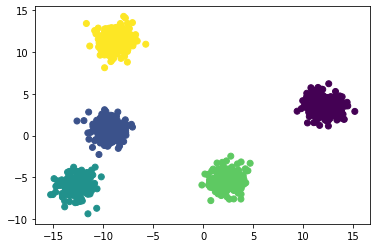

In [155]:
plt.scatter(*X_pc.T, c=y )

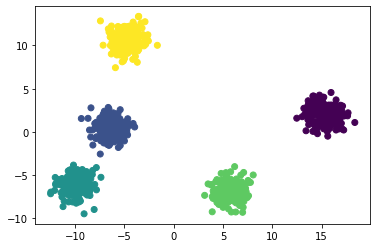

In [156]:
X_p = PCA(n_components=2).fit_transform(x)
plt.scatter(*X_p.T, c=y )